In [1]:
import numpy as np
import pandas as pd
import sklearn.preprocessing as preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.model_selection as cross_validation
import sklearn.linear_model as linear_model
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection  import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [3]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [4]:
file = r'''/Users/aaronhxzhang/AARD/Data/CrashData47436.xlsx'''
data = pd.ExcelFile(file)
crash_df = data.parse('Sheet1')
print(list(crash_df))
print(crash_df.shape)

['Crash Hour', 'City/Town', 'MassHighway District', 'Number of NonFatal Injuries', 'Number of Fatal Injuries', 'Number of Vehicles', 'Manner of Collision', 'Age of Driver - Youngest Known', 'Age of Driver - Oldest Known', 'Road Surface', 'Ambient Light', 'Weather Condition', 'Traffic Way', 'Speed Limit', 'Roadway Intersection Type', 'Traffic Control Device Type', 'Traffic Device Functioning', 'Linked RI Number of Travel Lanes', 'Linked RI Street Operation', 'Linked RI Urban Type', 'Linked RI Average Daily Traffic']
(46077, 21)


In [5]:
crash_df = crash_df.drop(columns='City/Town')

In [6]:
crash_df.sample(6)

,Crash Hour,MassHighway District,Number of NonFatal Injuries,Number of Fatal Injuries,Number of Vehicles,Manner of Collision,Age of Driver - Youngest Known,Age of Driver - Oldest Known,Road Surface,Ambient Light,Weather Condition,Traffic Way,Speed Limit,Roadway Intersection Type,Traffic Control Device Type,Traffic Device Functioning,Linked RI Number of Travel Lanes,Linked RI Street Operation,Linked RI Urban Type,Linked RI Average Daily Traffic
32721,02:00PM to 02:59PM,4,1,0,1,Single vehicle crash,55-64,55-64,Dry,Daylight,Clear,"Two-way, not divided",30,Not at junction,No controls,"Yes, device functioning",2,Two-way traffic,Large Urbanized Area,2596
40477,09:00AM to 09:59AM,5,0,0,2,"Sideswipe, same direction",55-64,55-64,Dry,Daylight,Cloudy,"Two-way, not divided",0,Not at junction,No controls,Not reported,2,Two-way traffic,Large Urbanized Area,7540
30173,07:00AM to 07:59AM,4,0,0,2,Rear-end,45-54,45-54,Dry,Daylight,Clear,"Two-way, divided, positive median barrier",65,Not at junction,No controls,Not reported,3,Two-way traffic,Large Urbanized Area,121556
39698,05:00PM to 05:59PM,5,0,0,2,Angle,25-34,55-64,Dry,Dark - lighted roadway,Clear,"Two-way, not divided",30,T-intersection,Flashing traffic control signal,"Yes, device functioning",2,Two-way traffic,Large Urbanized Area,9282
45661,09:00AM to 09:59AM,3,1,0,2,Angle,45-54,55-64,Dry,Daylight,Cloudy,"Two-way, not divided",30,Four-way intersection,Traffic control signal,"Yes, device functioning",4,Two-way traffic,Large Urbanized Area,19332
40420,05:00PM to 05:59PM,5,0,0,1,Rear-end,65-74,65-74,Dry,Dark - lighted roadway,Clear,"Two-way, not divided",0,Five-point or more,Traffic control signal,"Yes, device functioning",2,Two-way traffic,Large Urbanized Area,18532


In [7]:
crash_df['Speed Limit']=np.where(crash_df['Speed Limit'] == 0, 10, crash_df['Speed Limit'])
crash_df['Speed Limit']=np.where(crash_df['Speed Limit'] == 1, 10, crash_df['Speed Limit'])
crash_df['Speed Limit']=np.where(crash_df['Speed Limit'] == 2, 10, crash_df['Speed Limit'])
crash_df['Speed Limit']=np.where(crash_df['Speed Limit'] == 3, 10, crash_df['Speed Limit'])
crash_df['Speed Limit']=np.where(crash_df['Speed Limit'] == 4, 10, crash_df['Speed Limit'])
crash_df['Speed Limit']=np.where(crash_df['Speed Limit'] == 452, 45, crash_df['Speed Limit'])
crash_df['Speed Limit']=np.where(crash_df['Speed Limit'] == 135, 35, crash_df['Speed Limit'])
crash_df['Speed Limit']=np.where(crash_df['Speed Limit'] == 555, 55, crash_df['Speed Limit'])
crash_df['Speed Limit']=np.where(crash_df['Speed Limit'] == 320, 40, crash_df['Speed Limit'])
crash_df['Speed Limit']=np.where(crash_df['Speed Limit'] == 90, 65, crash_df['Speed Limit'])
crash_df['Speed Limit'].unique()

array([65, 30, 10, 40, 35, 25,  5, 50, 55, 45, 60, 20, 15, 31, 42, 64, 12,
       36, 80, 33,  8])

In [8]:
crash_df['Number of NonFatal Injuries']=np.where(crash_df['Number of NonFatal Injuries'] == 1, 1, crash_df['Number of NonFatal Injuries'])
crash_df['Number of NonFatal Injuries']=np.where(crash_df['Number of NonFatal Injuries'] == 2, 1, crash_df['Number of NonFatal Injuries'])
crash_df['Number of NonFatal Injuries']=np.where(crash_df['Number of NonFatal Injuries'] == 3, 1, crash_df['Number of NonFatal Injuries'])
crash_df['Number of NonFatal Injuries']=np.where(crash_df['Number of NonFatal Injuries'] == 4, 1, crash_df['Number of NonFatal Injuries'])
crash_df['Number of NonFatal Injuries']=np.where(crash_df['Number of NonFatal Injuries'] == 5, 1, crash_df['Number of NonFatal Injuries'])
crash_df['Number of NonFatal Injuries']=np.where(crash_df['Number of NonFatal Injuries'] == 6, 1, crash_df['Number of NonFatal Injuries'])
crash_df['Number of NonFatal Injuries']=np.where(crash_df['Number of NonFatal Injuries'] == 7, 1, crash_df['Number of NonFatal Injuries'])
crash_df['Number of NonFatal Injuries']=np.where(crash_df['Number of NonFatal Injuries'] == 8, 1, crash_df['Number of NonFatal Injuries'])
crash_df['Number of NonFatal Injuries']=np.where(crash_df['Number of NonFatal Injuries'] == 9, 1, crash_df['Number of NonFatal Injuries'])
crash_df['Number of NonFatal Injuries']=np.where(crash_df['Number of NonFatal Injuries'] == 18, 1, crash_df['Number of NonFatal Injuries'])
crash_df['Number of NonFatal Injuries']=np.where(crash_df['Number of NonFatal Injuries'] == 0, 0, crash_df['Number of NonFatal Injuries'])
crash_df['Number of NonFatal Injuries'].unique()

array([0, 1])

In [9]:
def summarize_data(df):
    for column in df.columns:
            print(column)
            if df.dtypes[column] == np.object:    #categorical data
                print(df[column].value_counts())
            else:
                print (df[column].describe())
                
            print ('\n')
            
summarize_data(crash_df)

Crash Hour
04:00PM to 04:59PM    4011
05:00PM to 05:59PM    4006
03:00PM to 03:59PM    3788
02:00PM to 02:59PM    3410
12:00PM to 12:59PM    2855
06:00PM to 06:59PM    2801
01:00PM to 01:59PM    2794
11:00AM to 11:59AM    2456
08:00AM to 08:59AM    2425
07:00AM to 07:59AM    2230
10:00AM to 10:59AM    2100
09:00AM to 09:59AM    2052
07:00PM to 07:59PM    1933
08:00PM to 08:59PM    1464
09:00PM to 09:59PM    1384
06:00AM to 06:59AM    1179
10:00PM to 10:59PM    1074
11:00PM to 11:59PM     876
12:00AM to 12:59AM     730
01:00AM to 01:59AM     631
05:00AM to 05:59AM     610
02:00AM to 02:59AM     553
03:00AM to 03:59AM     365
04:00AM to 04:59AM     350
Name: Crash Hour, dtype: int64


MassHighway District
count    46077.000000
mean         4.003863
std          1.319494
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          6.000000
Name: MassHighway District, dtype: float64


Number of NonFatal Injuries
count    46077.000000
mean         0.2

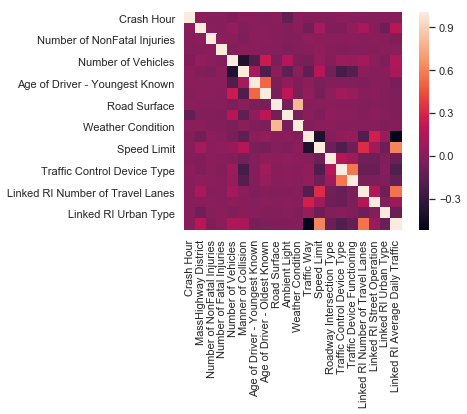

,Crash Hour,MassHighway District,Number of NonFatal Injuries,Number of Fatal Injuries,Number of Vehicles,Manner of Collision,Age of Driver - Youngest Known,Age of Driver - Oldest Known,Road Surface,Ambient Light,Weather Condition,Traffic Way,Speed Limit,Roadway Intersection Type,Traffic Control Device Type,Traffic Device Functioning,Linked RI Number of Travel Lanes,Linked RI Street Operation,Linked RI Urban Type,Linked RI Average Daily Traffic
46067,18,5,0,0,2,7,4,6,8,4,13,3,10,2,5,2,2,1,1,3004
46068,20,5,1,0,2,4,2,4,8,4,13,4,10,3,1,1,2,1,1,11288
46069,20,5,0,0,2,4,0,4,0,4,13,4,10,3,1,1,2,1,1,6719
46070,17,6,0,1,1,8,2,2,0,0,2,4,25,10,6,2,2,1,1,36923
46071,4,6,0,2,1,8,2,2,2,0,2,4,25,3,1,1,2,1,1,9403
46072,20,2,0,0,2,0,3,3,0,4,2,1,10,0,1,0,2,1,0,4583
46073,7,2,0,0,2,0,1,3,8,4,35,4,10,8,1,1,2,1,0,4458
46074,5,1,0,0,2,4,0,4,8,4,35,1,10,6,1,0,2,1,4,16094
46075,5,1,0,0,2,0,1,5,0,4,2,2,10,8,5,0,4,1,4,10297
46076,16,1,0,0,2,0,5,7,0,4,2,3,10,2,1,1,2,1,4,8850


In [10]:
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

#Calculate the correlation and plot it
encoded_data, _ = number_encode_features(crash_df)
sns.heatmap(encoded_data.corr(), square=True)  #try out 
plt.show()

encoded_data.tail(10)

In [11]:
encoded_data.columns

Index(['Crash Hour', 'MassHighway District', 'Number of NonFatal Injuries',
       'Number of Fatal Injuries', 'Number of Vehicles', 'Manner of Collision',
       'Age of Driver - Youngest Known', 'Age of Driver - Oldest Known',
       'Road Surface', 'Ambient Light', 'Weather Condition', 'Traffic Way',
       'Speed Limit', 'Roadway Intersection Type',
       'Traffic Control Device Type', 'Traffic Device Functioning',
       'Linked RI Number of Travel Lanes', 'Linked RI Street Operation',
       'Linked RI Urban Type', 'Linked RI Average Daily Traffic'],
      dtype='object')

In [12]:
crash_df_vars=encoded_data.columns.values.tolist()
to_keep=[i for i in crash_df_vars]

In [13]:
data_final=encoded_data[to_keep]
data_final.columns.values

array(['Crash Hour', 'MassHighway District',
       'Number of NonFatal Injuries', 'Number of Fatal Injuries',
       'Number of Vehicles', 'Manner of Collision',
       'Age of Driver - Youngest Known', 'Age of Driver - Oldest Known',
       'Road Surface', 'Ambient Light', 'Weather Condition',
       'Traffic Way', 'Speed Limit', 'Roadway Intersection Type',
       'Traffic Control Device Type', 'Traffic Device Functioning',
       'Linked RI Number of Travel Lanes', 'Linked RI Street Operation',
       'Linked RI Urban Type', 'Linked RI Average Daily Traffic'],
      dtype=object)

In [14]:
data_final_vars=data_final.columns.values.tolist()
y=['Number of NonFatal Injuries']
X=[i for i in data_final_vars if i not in y]

In [15]:
logreg = LogisticRegression()

In [16]:
rfe = RFE(logreg, 1)
rfe = rfe.fit(data_final[X], data_final[y] )
print(rfe.support_)
print(rfe.ranking_)

/Users/aaronhxzhang/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/aaronhxzhang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aaronhxzhang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aaronhxzhang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aaronhxzhang/anaconda3/lib/python3.7/site-packages

[False False  True False False False False False False False False False
 False False False False False False False]
[18  9  1  7  5  6 12 13  4 17  3 14 11 10  2  8 15 16 19]


/Users/aaronhxzhang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aaronhxzhang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aaronhxzhang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
